# Abalone Case Study

Predicting the age of abalone from physical measurements. 
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone_data.csv',names=['Sex','Length','Diameter','height','whole weight',
                                                  'Shucked weight','Viscera weight','Shell weight','Rings'])

In [3]:
df.shape

(4177, 9)

In [4]:
df.head()

,Sex,Length,Diameter,height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.describe()

,Length,Diameter,height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


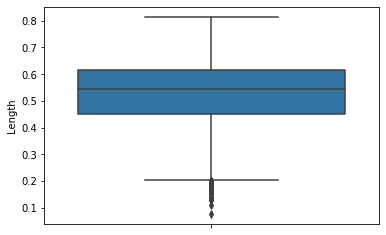

In [6]:
sns.boxplot(y='Length',data=df)

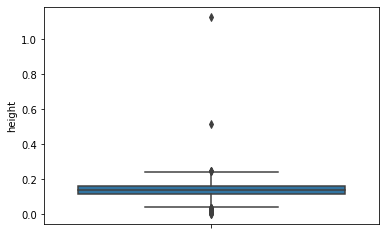

In [7]:
sns.boxplot(y='height',data=df)

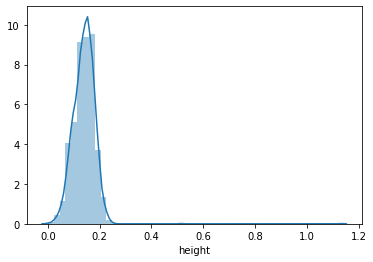

In [8]:
sns.distplot(df['height'])

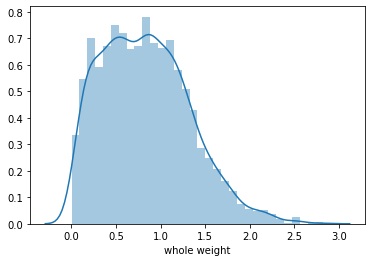

In [31]:
sns.distplot(df['whole weight'])

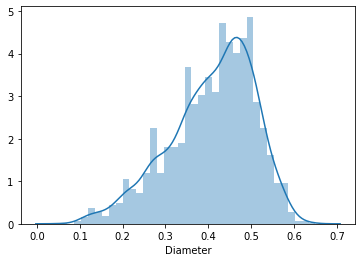

In [32]:
sns.distplot(df['Diameter'])

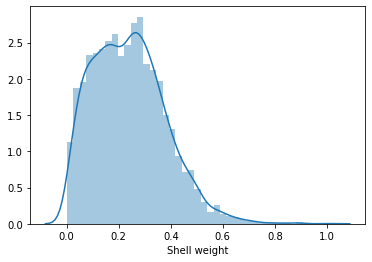

In [33]:
sns.distplot(df['Shell weight'])

In [9]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
df=pd.get_dummies(data=df, columns=['Sex'],drop_first=True)

In [11]:
df.isnull().sum()

Length            0
Diameter          0
height            0
whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_I             0
Sex_M             0
dtype: int64

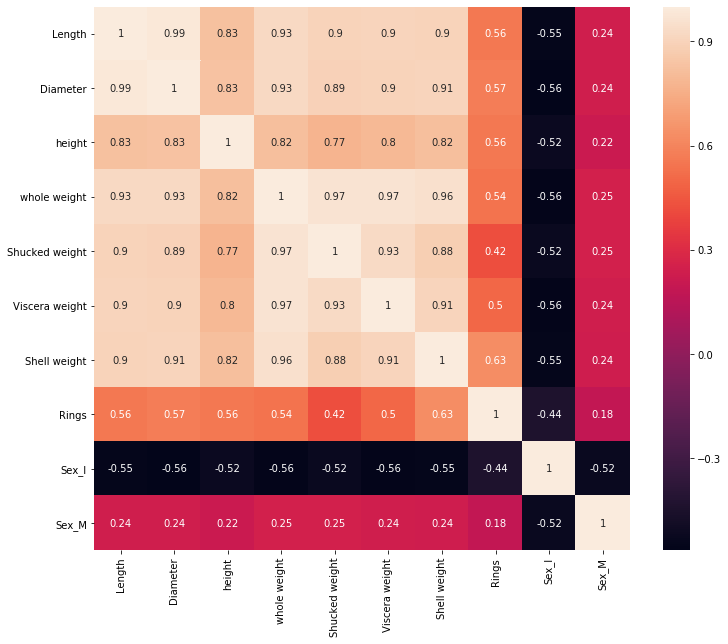

In [12]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [13]:
x=df.iloc[:,df.columns!='Rings']
x.head()

,Length,Diameter,height,whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x=scaling.fit_transform(x)

In [15]:
y=df.iloc[:,df.columns=='Rings']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.2679425837320574

In [18]:
from sklearn.svm import SVC
model2=SVC()
model2=model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.3043062200956938

In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,x,y,cv=100,scoring='accuracy')
score.mean()

0.26190957440155127

"""Let's do some feature engineering"""

In [20]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [21]:
"""
Because rings reflects the age we are going to change rings into three labels 

1: Infant
2: Young
3: Adult

"""

Age=[]
for i in df['Rings']:
    if  i<=10:
        Age.append(1)
    elif i<=20:
        Age.append(2)
    else:
        Age.append(3)

In [22]:
df['Age']=Age
df=df.drop(['Rings'],axis=1)

In [23]:
df.head()

,Length,Diameter,height,whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,0,1


In [24]:
x=df.iloc[:,df.columns!='Age']
y=df.iloc[:,df.columns=='Age']
df['Age'].value_counts()

1    2730
2    1411
3      36
Name: Age, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model7=LogisticRegression()
model7=model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
acc7=accuracy_score(y_test,y_pred)
acc7

0.7617224880382775

In [27]:
from sklearn.svm import SVC
model8=SVC()
model8=model8.fit(x_train,y_train)
y_pred=model8.predict(x_test)
acc8=accuracy_score(y_test,y_pred)
acc8

0.7492822966507177

In [28]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model8,x,y,cv=10,scoring='accuracy')
score.mean()

0.7419168172330848